In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#download the dataset
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Pakistan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

`twitter_samples` dataset consists of labeled positive and negative tweets with equal proportion. A balanced dataset

In [3]:
# loading positive and negative tweets
positive_twts=twitter_samples.strings('positive_tweets.json')
negative_twts = twitter_samples.strings('negative_tweets.json')

print('No. of positive tweets',len(positive_twts))
print('No. of negative tweets', len(negative_twts))

No. of positive tweets 5000
No. of negative tweets 5000


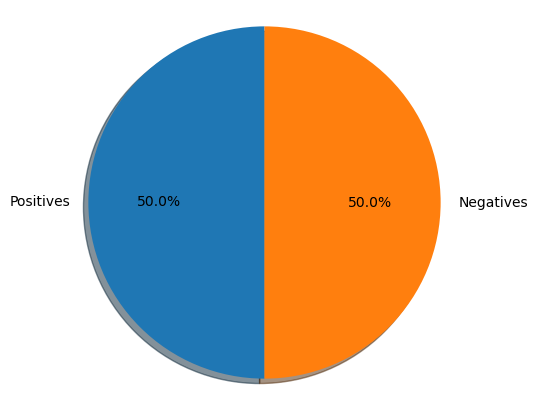

In [4]:
# visualize distribution of data using pie chart
fig = plt.figure(figsize=(5,5))

labels= 'Positives', 'Negatives'
sizes = [len(positive_twts), len(negative_twts)]
# plt.pie(sizes, labels, autopct = '%1.1f%%')
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.show()

# Processing the raw text

In [6]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer # 

## Remove hyperlinks, Twitter marks and styles and stemming

In [70]:


def process_tweet(tweet):
    # remove old style retweet text 'RT'
    tweet=re.sub(r'^RT[\s]+','',tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+','',tweet)
    # remove hastags
    tweet = re.sub(r'#','',tweet)

    # tokenization
    tokenizer = TweetTokenizer(preserve_case=False,
                              strip_handles=True,
                              reduce_len=True)
    tweet_tokens=tokenizer.tokenize(tweet)

    # removing the stop wods and punctuations
    stop_words = stopwords.words('english')
    tweet_clean = [word for word in tweet_tokens if word not in stop_words and word not in string.punctuation]

    # stemming the tweet words
    stemmer=PorterStemmer()
    stemmed_tweet = [stemmer.stem(word) for word in tweet_clean]
    
    
    return stemmed_tweet
    

In [71]:
processed_tweet=process_tweet(positive_twts[2277])
processed_tweet

['beauti',
 'sunflow',
 'sunni',
 'friday',
 'morn',
 ':)',
 'sunflow',
 'favourit',
 'happi',
 'friday',
 '…']